done
done
done
done
done
done
done
done
done
done
done
done
Tolerance   Minimizer (x1, x2)            Function Value      Iterations  
1.0e-01     (1.812031, 3.278634)          0.035565            10326       
1.0e-02     (1.979583, 3.918262)          0.000419            27996       
1.0e-03     (1.997940, 3.991718)          0.000004            47455       
1.0e-04     (1.999794, 3.999171)          0.000000            67112       
1.0e-05     (1.999979, 3.999917)          0.000000            86789       
1.0e-06     (1.999998, 3.999992)          0.000000            106468      
1.0e-07     (2.000000, 3.999999)          0.000000            126148      
1.0e-08     (2.000000, 4.000000)          0.000000            145827      
1.0e-09     (2.000000, 4.000000)          0.000000            165506      
1.0e-10     (2.000000, 4.000000)          0.000000            185186      
1.0e-11     (2.000000, 4.000000)          0.000000            204871      
1.0e-12     (2.000000, 4.000000)        

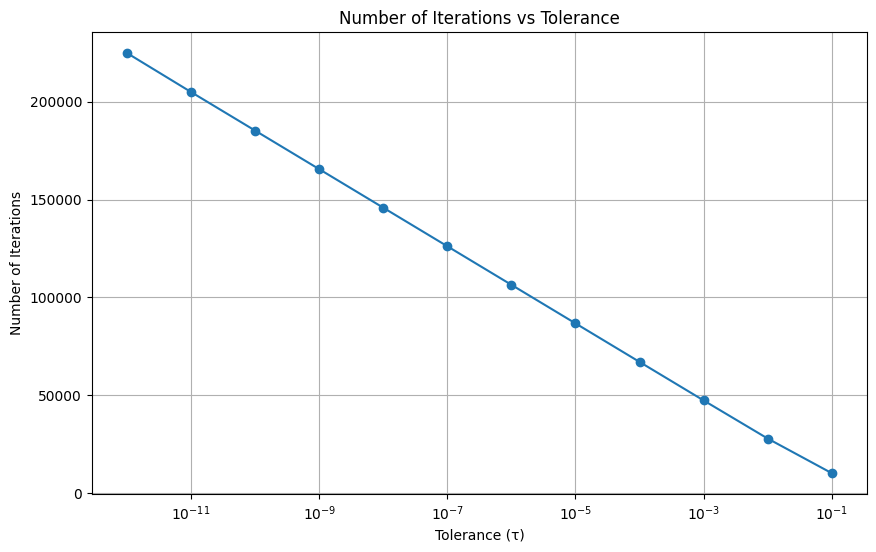

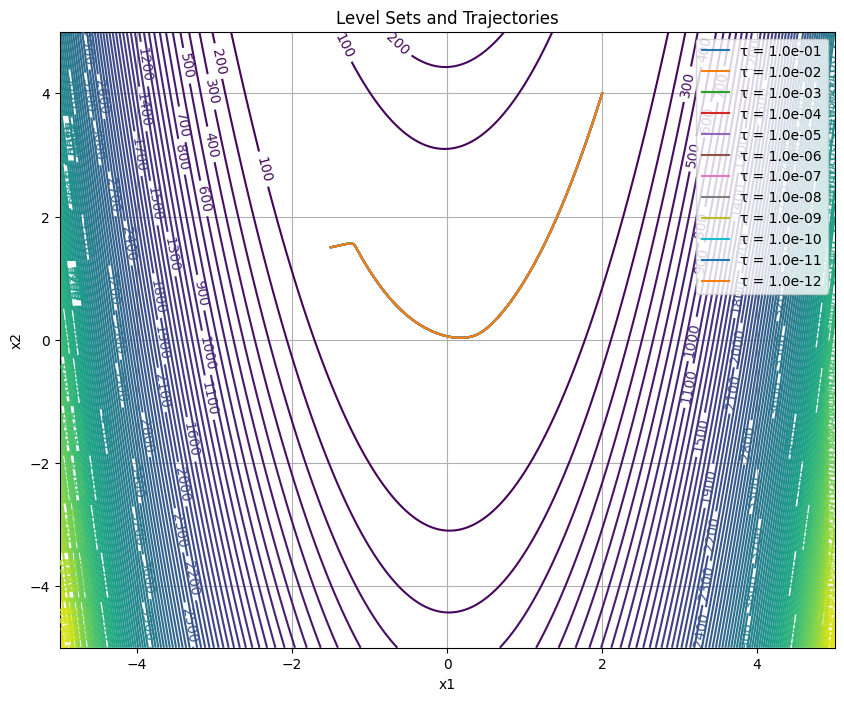

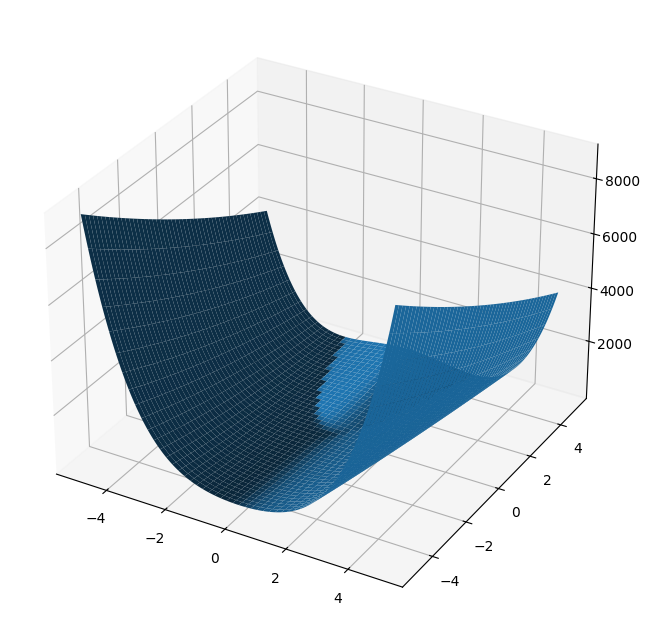

In [8]:
import numpy as np
import matplotlib.pyplot as plt


a = 1 
b = 100 if a % 2 == 0 else 10


def f(x1, x2):
    return (a + 1 - x1)**2 + b * (x2 - x1**2)**2

def grad_x1(x1, x2):
    return -2 * (a + 1 - x1) - 4 * b * x1 * (x2 - x1**2)

def grad_x2(x1, x2):
    return 2 * b * (x2 - x1**2)

def grad_norm(x1, x2):
    return np.sqrt(grad_x1(x1, x2)**2 + grad_x2(x1, x2)**2)


x0 = np.array([-1.5, 1.5]) 
eta = 0.001  
tolerances = [10**(-p) for p in range(1, 13)]  
results = []  
trajectories = {}  
for tau in tolerances:
    x1, x2 = x0
    k = 0
    trajectory = [(x1, x2)]
    
    while grad_norm(x1, x2) > tau:
        
        g1 = grad_x1(x1, x2)
        g2 = grad_x2(x1, x2)
        
        
        x1 -= eta * g1
        x2 -= eta * g2
        
        trajectory.append((x1, x2))
        k += 1
    
    
    print('done')
    results.append((tau, (x1, x2), f(x1, x2), k))
    trajectories[tau] = trajectory


print(f"{'Tolerance':<12}{'Minimizer (x1, x2)':<30}{'Function Value':<20}{'Iterations':<12}")
for tau, (x_min, y_min), f_val, iters in results:
    
    minimizer_str = f"({x_min:.6f}, {y_min:.6f})"
    print(f"{tau:<12.1e}{minimizer_str:<30}{f_val:<20.6f}{iters:<12}")



tolerance_vals = [res[0] for res in results]
iteration_vals = [res[3] for res in results]

plt.figure(figsize=(10, 6))
plt.plot(tolerance_vals, iteration_vals, marker='o')
plt.xscale('log')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Tolerance')
plt.grid(True)
plt.show()


x = np.linspace( - 5,  5, 400)
y = np.linspace( - 5,  5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
contour=plt.contour(X, Y, Z, levels=100, cmap='viridis')
plt.clabel(contour,inline=True)
for tau, traj in trajectories.items():
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label=f"τ = {tau:.1e}")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Trajectories')
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')  

ax.plot_surface(X, Y, Z)  

plt.show()  